In [3]:
import numpy as np  
import pandas as pd  

from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [4]:
data = pd.read_csv('./PG_2007_2017.csv', index_col = 'Date')

In [5]:
log_returns = np.log(1 + data.pct_change())

In [6]:
log_returns.tail()

,PG
Date,
2017-04-04,0.002562
2017-04-05,0.000667
2017-04-06,-0.006356
2017-04-07,-0.001903
2017-04-10,0.002910


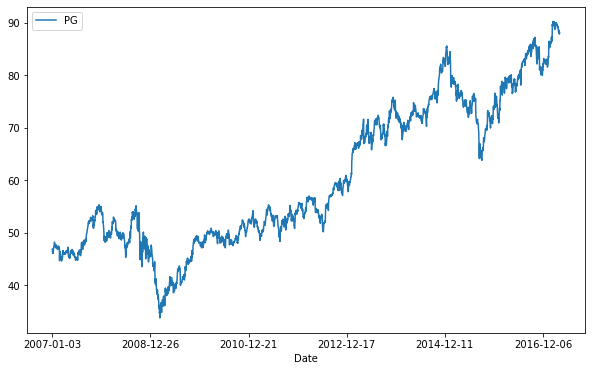

In [7]:
data.plot(figsize=(10, 6));

In [8]:
r = 0.025

In [9]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176109
dtype: float64

In [10]:
type(stdev)

pandas.core.series.Series

In [11]:
stdev = stdev.values
stdev

array([0.17610875])

In [12]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

In [20]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [21]:
S

array([[ 88.118629  ,  88.118629  ,  88.118629  , ...,  88.118629  ,
         88.118629  ,  88.118629  ],
       [ 85.74177109,  88.81649924,  88.85717012, ...,  87.15099138,
         88.45917653,  86.70294902],
       [ 84.91192715,  89.97862301,  89.52038871, ...,  85.02842556,
         87.12309855,  86.17329185],
       ...,
       [ 75.90532609, 103.21615959,  98.49268434, ...,  74.7955052 ,
        102.10776013,  88.18696144],
       [ 77.37073291, 103.17198427,  98.71264912, ...,  74.50739564,
        101.12994658,  87.91698536],
       [ 78.1275804 , 103.33747733,  98.64231941, ...,  75.055705  ,
        100.29703993,  88.09440401]])

In [22]:
S.shape

(251, 10000)

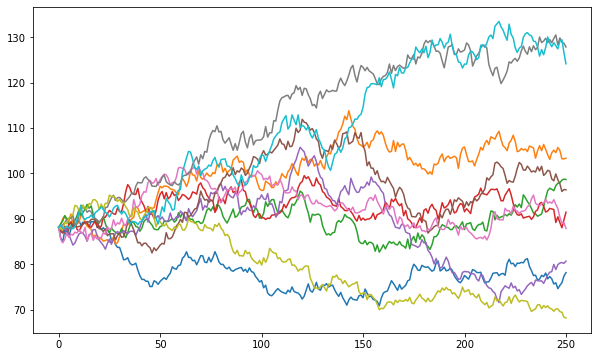

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

******

In [24]:
p = np.maximum(S[-1] - 110, 0)

In [25]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [26]:
p.shape

(10000,)

In [27]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

1.1280003102096205